## Exploratory Data Analysis (EDA) for Credit Default

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

- X2: Gender (1 = male; 2 = female).

- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

- X4: Marital status (1 = married; 2 = single; 3 = others).

- X5: Age (year).

- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; 
    - X11 = the repayment status in April, 2005. 

    The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005; 
    - X13 = amount of bill statement in August, 2005; 
    - X17 = amount of bill statement in April, 2005. 

- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005;
    - X23 = amount paid in April, 2005.

###### Datasource 
###### - Yeh, I. (2009). Default of Credit Card Clients [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

## Basic Dataset Information

In [20]:
# Import libraries. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Filter out warnings
warnings.filterwarnings('ignore')

# Load dataset. 
df = pd.read_excel("../data/raw/default_credit.xls", header=1)
# show dataframe 
# friendly reminder: default payment next month = Y and ID is the customer ID, and 
# other columns use for X1, X2, ..., X3, Xn. 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
# Get dataset dimensions
# df.shape
# Get column names and data types
df.info()
# Get column names only
#df.columns
# Check for missing values
#df.isnull().sum()
# Get unique values in each column
# df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Convert Data Types for Different Variables

In [22]:
# Convert categorical variables to proper categories
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Or convert to specific categories with meaningful labels
# df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'}).astype('category')
# df['EDUCATION'] = df['EDUCATION'].map({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}).astype('category')
# df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'}).astype('category')

# Convert numerical variables to proper numeric types
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert ID column
df['ID'] = df['ID'].astype('object')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  object  
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

## Statistical Analysis

In [ ]:
# Get count, mean, std, min, max, and 25%, 50%, 75% quantiles for numerical variables
df.describe(exclude='category', include='int64')   

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [25]:
# Get count, mean, std, min, max, and 25%, 50%, 75% quantiles for categorical variables
df.describe(exclude='int64', include='category') 

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10
top,2,2,2,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286


In [26]:
# Correlation matrix (for numerical variables)
# correlation_matrix = df.corr(numeric_only=True) 
# In this case, the correlation matrix is not very useful 
# because the variables are not correlated. 
# However, we can see that the variables are correlated with the target variable. 
# plt.figure(figsize=(12, 12)) # Adjust figure size as needed
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix Heatmap')
# plt.show()

## Data Quality Analysis

In [27]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
})
print("Missing Data Summary:")
print(missing_summary[missing_summary['Missing_Count'] > 0])

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Check for outliers in numerical variables
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_summary = {}
for col in numerical_cols:
    if col not in ['ID', 'default payment next month']:
        count, lower, upper = detect_outliers(df, col)
        outlier_summary[col] = {'count': count, 'lower': lower, 'upper': upper}

print("\nOutlier Summary:")
for col, info in outlier_summary.items():
    print(f"{col}: {info['count']} outliers")

Missing Data Summary:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Duplicate rows: 0

Outlier Summary:
LIMIT_BAL: 167 outliers
AGE: 272 outliers
BILL_AMT1: 2400 outliers
BILL_AMT2: 2395 outliers
BILL_AMT3: 2469 outliers
BILL_AMT4: 2622 outliers
BILL_AMT5: 2725 outliers
BILL_AMT6: 2693 outliers
PAY_AMT1: 2745 outliers
PAY_AMT2: 2714 outliers
PAY_AMT3: 2598 outliers
PAY_AMT4: 2994 outliers
PAY_AMT5: 2945 outliers
PAY_AMT6: 2958 outliers


## Target Variable Distribution

In [35]:
# Analyze the target variable distribution
target_distribution = df['default payment next month'].value_counts()
target_percentage = df['default payment next month'].value_counts(normalize=True)

print("Target Variable Distribution:")
print(f"Default (1): {target_distribution[1]} ({target_percentage[1]:.2%})")
print(f"No Default (0): {target_distribution[0]} ({target_percentage[0]:.2%})")

# Check for class imbalance
imbalance_ratio = target_distribution[1] / target_distribution[0]
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}")

# Correlation analysis
correlation_with_target = df[numerical_cols].corrwith(df['default payment next month'])
correlation_df = pd.DataFrame({
    'Correlation_with_Target': correlation_with_target
}).sort_values('Correlation_with_Target', ascending=False)

Target Variable Distribution:
Default (1): 6636 (22.12%)
No Default (0): 23364 (77.88%)
Class Imbalance Ratio: 0.28


## Data Visualization Section

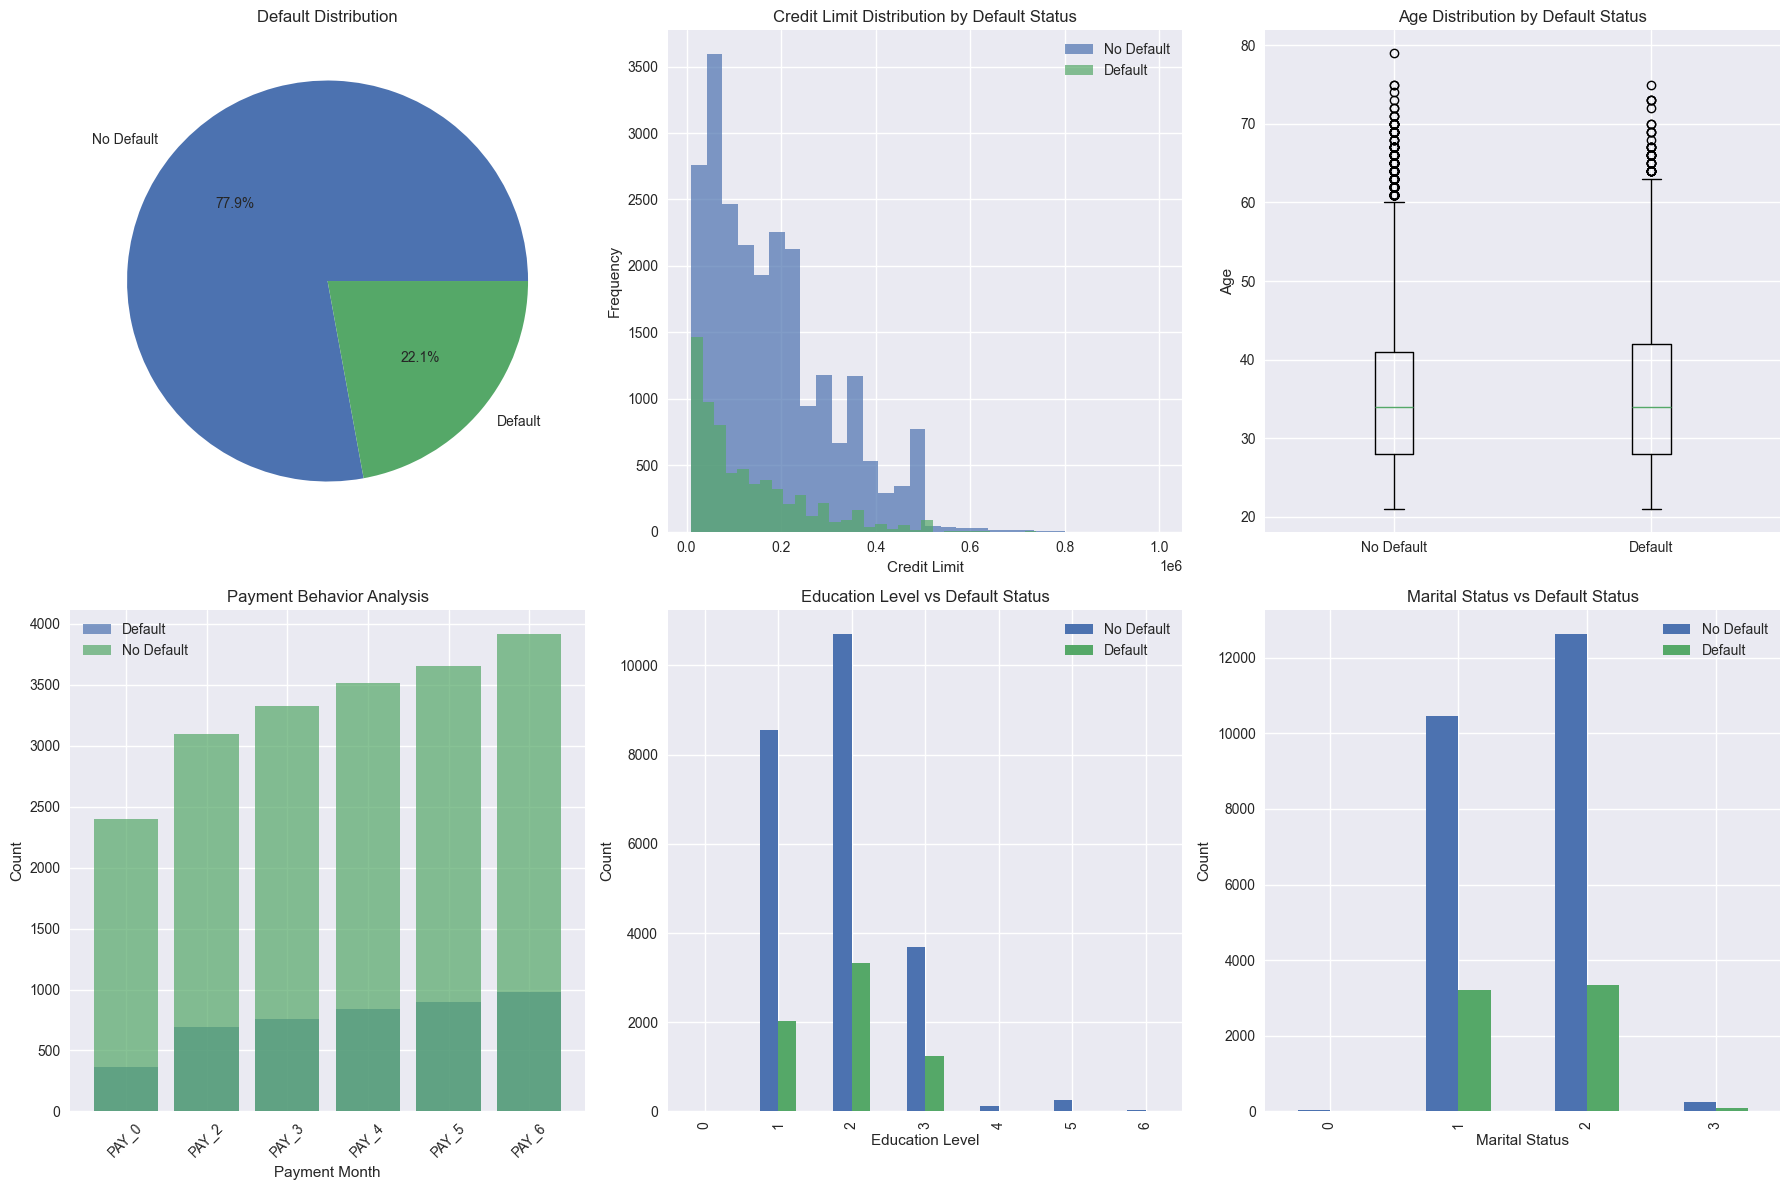

In [36]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Target variable distribution
axes[0,0].pie(target_distribution.values, labels=['No Default', 'Default'], autopct='%1.1f%%')
axes[0,0].set_title('Default Distribution')

# 2. Credit limit distribution by default status
axes[0,1].hist(df[df['default payment next month']==0]['LIMIT_BAL'], alpha=0.7, label='No Default', bins=30)
axes[0,1].hist(df[df['default payment next month']==1]['LIMIT_BAL'], alpha=0.7, label='Default', bins=30)
axes[0,1].set_xlabel('Credit Limit')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Credit Limit Distribution by Default Status')
axes[0,1].legend()

# 3. Age distribution by default status
axes[0,2].boxplot([df[df['default payment next month']==0]['AGE'], 
                   df[df['default payment next month']==1]['AGE']], 
                  labels=['No Default', 'Default'])
axes[0,2].set_ylabel('Age')
axes[0,2].set_title('Age Distribution by Default Status')

# 4. Payment behavior analysis
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
default_payment_counts = df[df['default payment next month']==1][payment_cols].apply(pd.Series.value_counts)
no_default_payment_counts = df[df['default payment next month']==0][payment_cols].apply(pd.Series.value_counts)

axes[1,0].bar(range(len(payment_cols)), default_payment_counts.iloc[0], alpha=0.7, label='Default')
axes[1,0].bar(range(len(payment_cols)), no_default_payment_counts.iloc[0], alpha=0.7, label='No Default')
axes[1,0].set_xlabel('Payment Month')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Payment Behavior Analysis')
axes[1,0].set_xticks(range(len(payment_cols)))
axes[1,0].set_xticklabels(payment_cols, rotation=45)
axes[1,0].legend()

# 5. Education vs Default
education_default = pd.crosstab(df['EDUCATION'], df['default payment next month'])
education_default.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Education Level vs Default Status')
axes[1,1].set_xlabel('Education Level')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(['No Default', 'Default'])

# 6. Marital status vs Default
marriage_default = pd.crosstab(df['MARRIAGE'], df['default payment next month'])
marriage_default.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Marital Status vs Default Status')
axes[1,2].set_xlabel('Marital Status')
axes[1,2].set_ylabel('Count')
axes[1,2].legend(['No Default', 'Default'])

plt.tight_layout()
plt.show()

## Feature Engineering 

In [37]:
# Create new features
df['CREDIT_UTILIZATION'] = df['BILL_AMT1'] / df['LIMIT_BAL']
df['PAYMENT_RATIO'] = df['PAY_AMT1'] / (df['BILL_AMT1'] + 1)  # Add 1 to avoid division by zero
df['AVG_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df['AVG_PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

# Payment behavior score
df['PAYMENT_SCORE'] = df[payment_cols].apply(lambda x: (x == -1).sum(), axis=1)

print("New Features Created:")
print(df[['CREDIT_UTILIZATION', 'PAYMENT_RATIO', 'AVG_BILL_AMT', 'AVG_PAY_AMT', 'PAYMENT_SCORE']].describe())

New Features Created:
       CREDIT_UTILIZATION  PAYMENT_RATIO   AVG_BILL_AMT    AVG_PAY_AMT  \
count        30000.000000   2.999200e+04   30000.000000   30000.000000   
mean             0.423771            inf   44976.945200    5275.232094   
std              0.411462            NaN   63260.721860   10137.946323   
min             -0.619892  -1.088325e+04  -56043.166667       0.000000   
25%              0.022032   3.437551e-02    4781.333333    1113.291667   
50%              0.313994   5.558873e-02   21051.833333    2397.166667   
75%              0.829843   2.637039e-01   57104.416667    5583.916667   
max              6.455300            inf  877313.833333  627344.333333   

       PAYMENT_SCORE  
count   30000.000000  
mean        1.154667  
std         1.929111  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max         6.000000  


## Summary and Insight Section

In [38]:
# Key insights summary
print("=== CREDIT DEFAULT ANALYSIS - KEY INSIGHTS ===\n")

print("1. DATASET OVERVIEW:")
print(f"   - Total records: {len(df):,}")
print(f"   - Default rate: {target_percentage[1]:.2%}")
print(f"   - Features: {len(df.columns)}")

print("\n2. RISK FACTORS:")
print("   - High correlation features with default:")
for idx, row in correlation_df.head(5).iterrows():
    print(f"     * {idx}: {row['Correlation_with_Target']:.3f}")

print("\n3. DEMOGRAPHIC INSIGHTS:")
print(f"   - Average age: {df['AGE'].mean():.1f} years")
print(f"   - Gender distribution: {df['SEX'].value_counts().to_dict()}")
print(f"   - Education distribution: {df['EDUCATION'].value_counts().to_dict()}")

print("\n4. FINANCIAL INSIGHTS:")
print(f"   - Average credit limit: ${df['LIMIT_BAL'].mean():,.0f}")
print(f"   - Average bill amount: ${df['AVG_BILL_AMT'].mean():,.0f}")
print(f"   - Average payment amount: ${df['AVG_PAY_AMT'].mean():,.0f}")

=== CREDIT DEFAULT ANALYSIS - KEY INSIGHTS ===

1. DATASET OVERVIEW:
   - Total records: 30,000
   - Default rate: 22.12%
   - Features: 30

2. RISK FACTORS:
   - High correlation features with default:
     * default payment next month: 1.000
     * AGE: 0.014
     * BILL_AMT6: -0.005
     * BILL_AMT5: -0.007
     * BILL_AMT4: -0.010

3. DEMOGRAPHIC INSIGHTS:
   - Average age: 35.5 years
   - Gender distribution: {2: 18112, 1: 11888}
   - Education distribution: {2: 14030, 1: 10585, 3: 4917, 5: 280, 4: 123, 6: 51, 0: 14}

4. FINANCIAL INSIGHTS:
   - Average credit limit: $167,484
   - Average bill amount: $44,977
   - Average payment amount: $5,275
